### Various modules loaded

In [1]:
# plotting
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)
import numpy as np
from numpy import diff
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import csv

## Extract data for each sector in a separate file:

In [2]:
keyList = []
dataList = []
startnew=False
firsttime=True
flist=[]
with open('/home/stefan/Downloads/jython/fin.txt','r') as f:
    for line in f:
        if line.startswith('#'):
            if startnew:
                startnew=False
                fname=a[0]+'_'+b[0]+'_'+c[0]+'.csv' # file name  
                with open(fname,'w',newline='') as file:
                    write=csv.writer(file, delimiter=',')
                    write.writerows(dataList)
                dataList=[]
                flist.append(fname)
                file.close()
            if line.startswith("# index"):
                a=(re.findall('\d+', line ))
            if line.startswith("# iIndex"):
                b=(re.findall('\d+', line ))
            if line.startswith("# jIndex"):
                c=(re.findall('\d+', line ))
            #key, comment = line.split('\n')
            #keyList.append(key[1:])
        else:
            startnew=True
            nums = line.split() # split the line into a list of strings by whitespace
            nums = [float(i) for i in nums]
            dataList.append([nums[6],nums[1]])


## Try single file:

In [5]:
infile = open('72_8_2.csv', 'r')
df = pd.read_csv(infile,header=None)
dfm=df.as_matrix()
dff=dfm[:,1]
nt=len(dff)
pos=np.linspace(0,nt,nt)

<IPython.core.display.Javascript object>


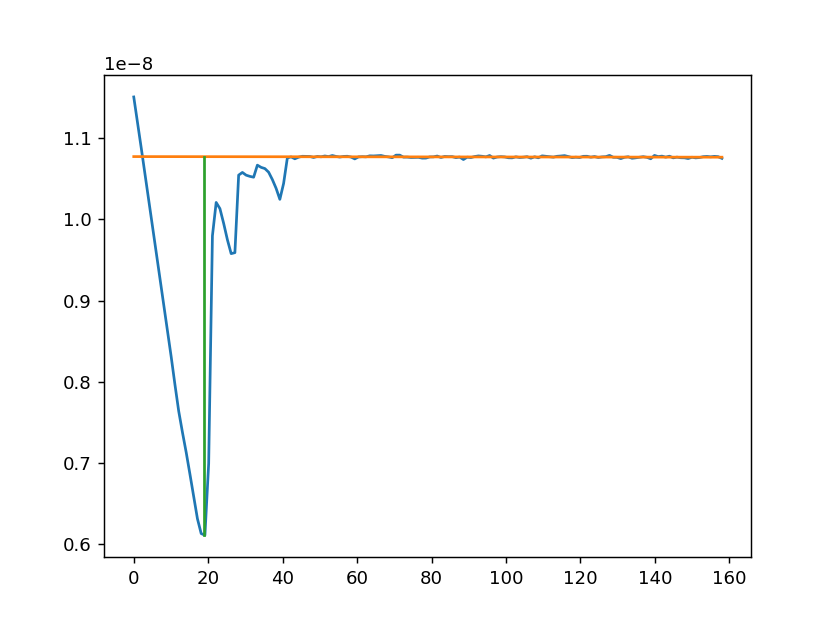

19 1.0773250611605602e-08
4.665460311605602e-09


In [10]:
fig,ax=plt.subplots(1,1)
ax.plot(pos,dff)
mipos=np.where(dff == np.amin(dff))[0][0]
mival=np.amin(dff)
fit = np.polyfit(pos[int(nt/2):nt],dff[int(nt/2):nt],1)
fit_fn = np.poly1d(fit)
ax.plot(pos,fit_fn(pos))
print(mipos,fit_fn(mipos))
dist=fit_fn(mipos)-mival
#ax.plot([[20,0],[1e-8,1e-8]],'.')
print(dist)
ax.plot([mipos,mipos],[mival,fit_fn(mipos)],'-')

## Try file by filename from index:

<IPython.core.display.Javascript object>


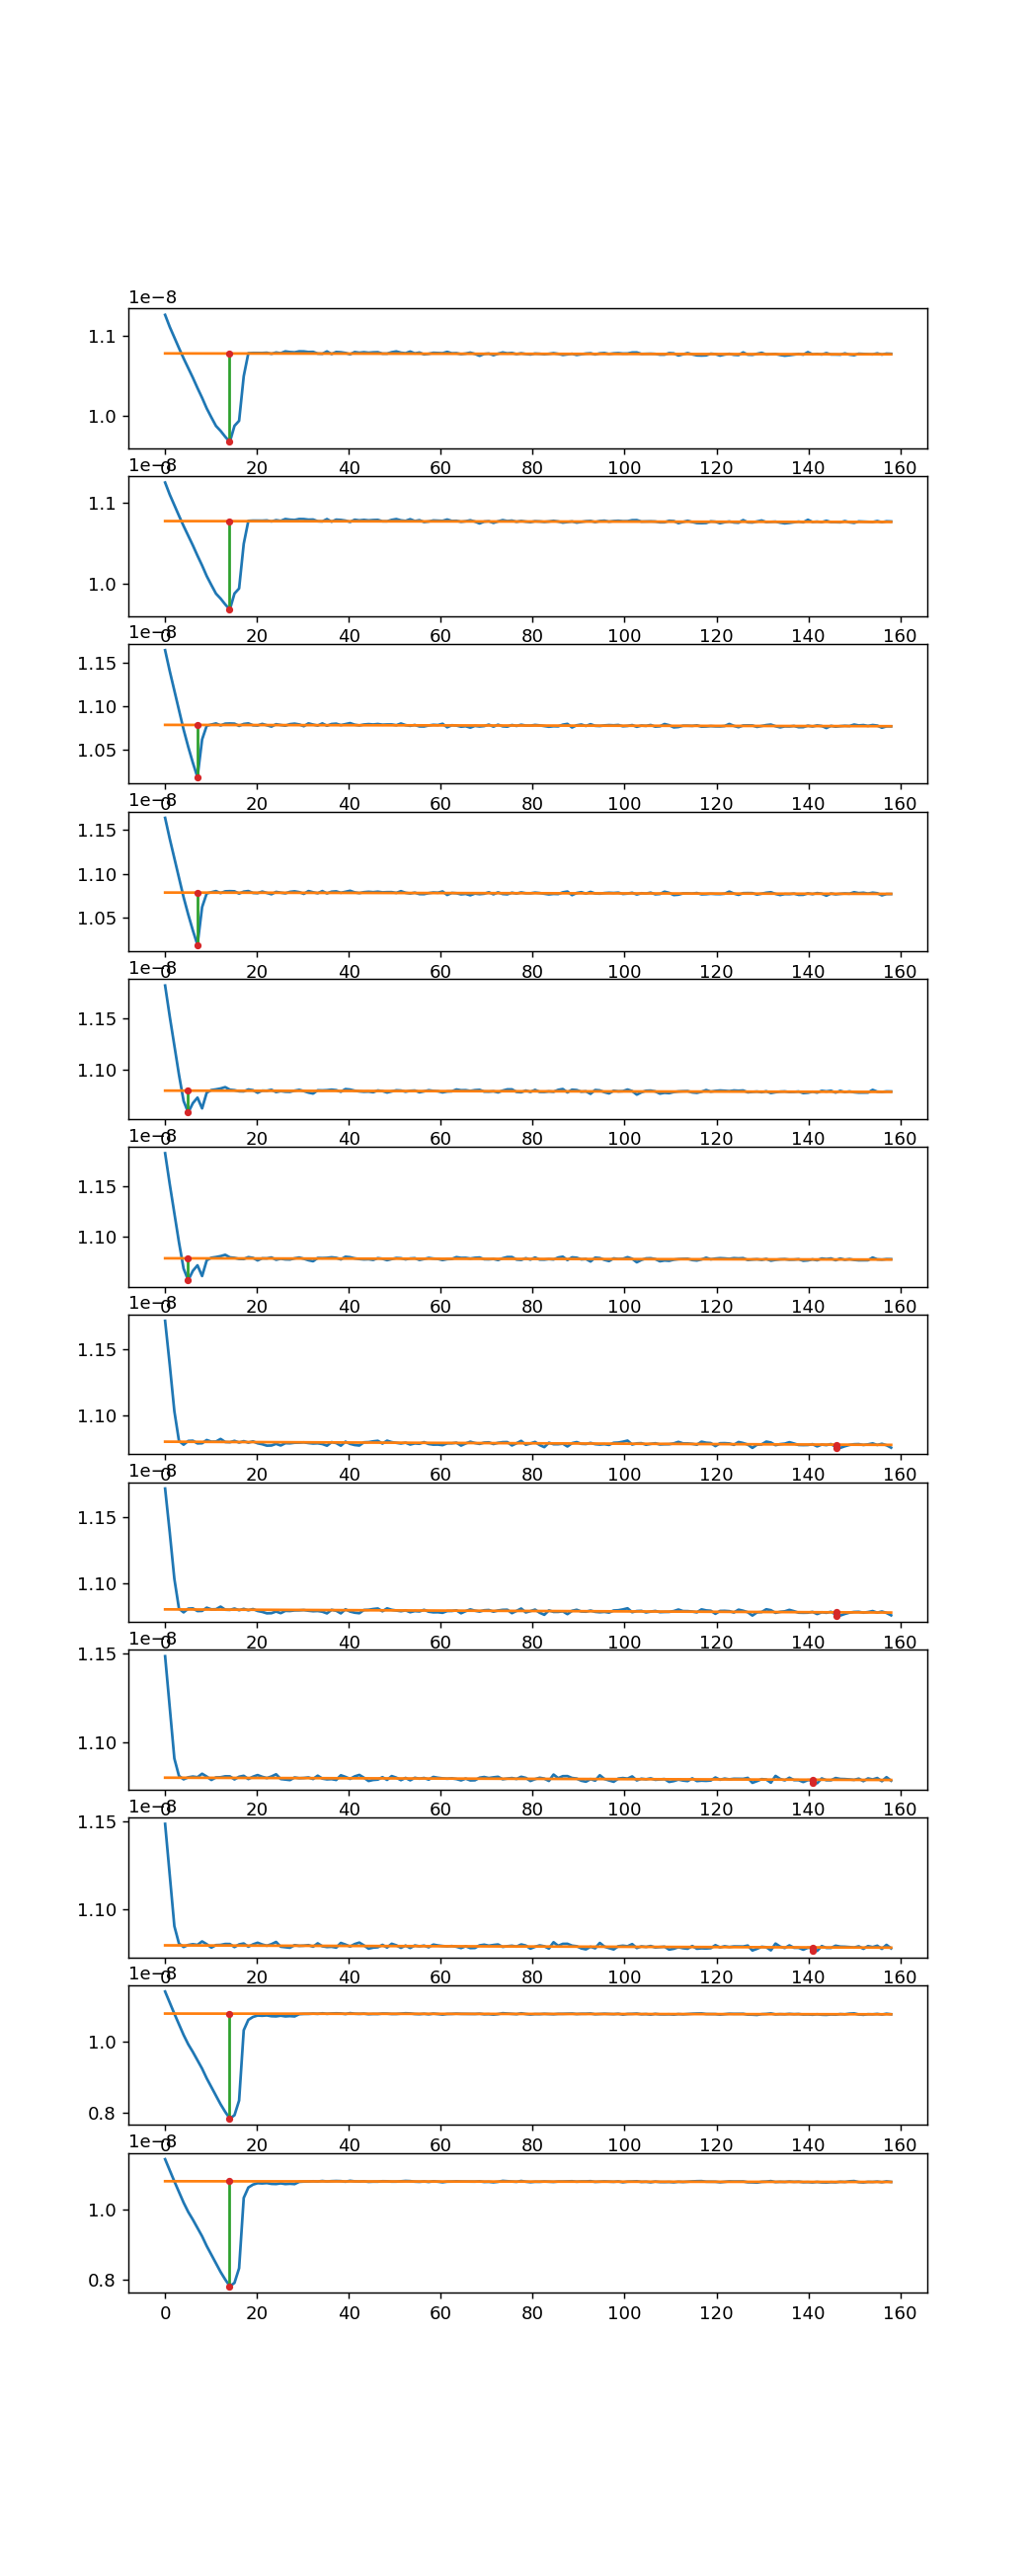

14 1.0775319652040015e-08
1.099148652040015e-09
14 1.0775319652040015e-08
1.099148652040015e-09
7 1.0785633958548539e-08
5.980719585485398e-10
7 1.0785633958548539e-08
5.980719585485398e-10
5 1.0788057023884281e-08
2.1638552388428156e-10
5 1.0788057023884281e-08
2.1638552388428156e-10
146 1.0782223275991425e-08
2.4366275991425224e-11
146 1.0782223275991425e-08
2.4366275991425224e-11
141 1.0786697873474444e-08
1.9806873474442784e-11
141 1.0786697873474444e-08
1.9806873474442784e-11
14 1.0802034202281036e-08
2.9732692022810343e-09
14 1.0802034202281036e-08
2.9732692022810343e-09


In [27]:
fig,ax=plt.subplots(12,1,figsize=(8,20))
for na in range(0,12):
    fi=flist[na]
    df = pd.read_csv(fi,header=None)
    dfm=df.as_matrix()
    dff=dfm[:,1]
    nt=len(dff)
    pos=np.linspace(0,nt,nt)
    ax[na].plot(pos,dff)
    mipos=np.where(dff == np.amin(dff))[0][0]
    mival=np.amin(dff)
    fit = np.polyfit(pos[int(nt/2):nt],dff[int(nt/2):nt],1)
    fit_fn = np.poly1d(fit)
    ax[na].plot(pos,fit_fn(pos))
    print(mipos,fit_fn(mipos))
    dist=fit_fn(mipos)-mival
    print(dist)
    ax[na].plot([mipos,mipos],[mival,fit_fn(mipos)],'-')
    ax[na].plot([mipos,mipos],[mival,fit_fn(mipos)],'.')


In [3]:
fig,ax=plt.subplots(12,1,figsize=(8,20))
results=[]
for na in range(0,12):
    fi=flist[na]
    df = pd.read_csv(fi,header=None)
    dfm=df.as_matrix()
    dff=dfm[:,1]
    nt=len(dff)
    pos=np.linspace(0,nt,nt)
    ax[na].plot(pos,dff)
    difdff=diff(dff)
    mipos=np.argmax(difdff>0)
    mival=dff[mipos]
    fit = np.polyfit(pos[int(nt/2):nt],dff[int(nt/2):nt],1)
    fit_fn = np.poly1d(fit)
    ax[na].plot(pos,fit_fn(pos))
    print(mipos,fit_fn(mipos))
    dist=fit_fn(mipos)-mival
    print(dist)
    ax[na].plot([mipos,mipos],[mival,fit_fn(mipos)],'-')
    ax[na].plot([mipos,mipos],[mival,fit_fn(mipos)],'.')
    results.append(fname,dist)

<IPython.core.display.Javascript object>

14 1.0775319652040015e-08
1.099148652040015e-09


TypeError: append() takes exactly one argument (2 given)

In [4]:
results=[]
for na in range(0,12):
    fi=flist[na]
    df = pd.read_csv(fi,header=None)
    dfm=df.as_matrix()
    dff=dfm[:,1]
    nt=len(dff)
    pos=np.linspace(0,nt,nt)
    difdff=diff(dff)
    mipos=np.argmax(difdff>0)
    mival=dff[mipos]
    fit = np.polyfit(pos[int(nt/2):nt],dff[int(nt/2):nt],1)
    fit_fn = np.poly1d(fit)
    print(mipos,fit_fn(mipos))
    dist=fit_fn(mipos)-mival
    print(dist)
    results.append(fname,dist)

14 1.0775319652040015e-08
1.099148652040015e-09


TypeError: append() takes exactly one argument (2 given)

In [40]:
fig.savefig('test.pdf')

In [36]:
difdff=diff(dff)
np.argmax(difdff>0)

14

In [5]:
resa=[];resb=[];
for fi in flist:
    df = pd.read_csv(fi,header=None)
    dfm=df.as_matrix()
    dff=dfm[:,1]
    nt=len(dff)
    pos=np.linspace(0,nt,nt)
    difdff=diff(dff)
    mipos=np.argmax(difdff>0)
    mival=dff[mipos]
    fit = np.polyfit(pos[int(nt/2):nt],dff[int(nt/2):nt],1)
    fit_fn = np.poly1d(fit)
    dist=fit_fn(mipos)-mival
    resa.append([fi,dist])
    buf=[int(i) for i in       fi.split('.')[0].split('_')]
    buf.append(dist)
    resb.append(buf)

In [6]:
with open('results','w',newline='') as file:
                    write=csv.writer(file, delimiter=',')
                    write.writerows(resb)

In [61]:
flist[12].split('.')[0].split('_')

['6', '6', '0']